# 탐색적 데이터 분석(EDA)

In [2]:
# [TASK] 2.1 "semiconductor.csv"를 불러옵니다 (이전 실습 노트북을 참조 및 응용)
import pandas as pd
data = pd.read_csv('semiconductor.csv')
data.head()

,id,cycle_time_days,material_type,tool_wear_level,clean_room_pressure,layer_thickness_nm,chemical_concentration,etching_voltage,deposition_rate,humidity_level,photoresist_thickness_variation,etching_uniformity,particle_count,doping_concentration,product_defect
0,QJ-91472,64,0,4,155,325.0,0,0,145,0,1.2,2,0.0,3.0,0
1,PC-86982,57,1,4,110,239.0,0,0,120,1,3.0,2,1.0,7.0,1
2,OO-98895,50,0,3,120,248.0,0,0,154,0,0.3,2,0.0,3.0,0
3,GO-90966,54,0,4,123,209.0,0,0,143,1,0.8,1,0.0,3.0,0
4,ZS-55860,69,1,3,130,208.0,0,0,146,0,0.4,2,1.0,3.0,0


* `id`: 제품 ID, 고유한 식별자.
* `cycle_time_days`: 반도체 제조 공정의 주기 시간 (분 단위)
* `material_type`: 사용된 재료의 유형, 범주형. 코드: {'0': 'Si', '1': 'GaAs'}
* `tool_wear_level`: 제조 도구의 마모 수준, 범주형. 코드: {'1': 'Low', '2': 'Medium', '3': 'High', '4': 'Critical'}
* `clean_room_pressure`: 클린룸 내 압력 (파스칼)
* `layer_thickness_nm`: 반도체 층의 두께 (나노미터)
* `chemical_concentration`: 사용된 화학물질의 농도, 범주형. 코드: {'0': 'Low', '1': 'High'}
* `etching_voltage`: 식각 공정에 사용된 전압, 범주형. 코드: {'0': 'Standard', '1': 'Increased', '2': 'High'}
* `deposition_rate`: 제조 공정의 증착률
* `humidity_level`: 제조 환경의 습도 수준, 범주형. 코드: {'0': 'Low', '1': 'High'}
* `photoresist_thickness_variation`: 포토레지스트 두께의 변동
* `etching_uniformity`: 식각 공정의 균일성, 범주형. 코드: {'1': 'Uniform', '2': 'Moderate', '3': 'Varied'}
* `particle_count`: 반도체 표면에 검출된 입자 수, 범주형. 코드: {'0.0': 'None', '1.0': 'Few', '2.0': 'Some', '3.0': 'Many'}
* `doping_concentration`: 도핑 물질 사용 농도, 범주형. 코드: {'3.0': 'Low', '7.0': 'High'}
* `product_defect`: 제품의 결함 여부 (1: 결함 있음, 0: 결함 없음)

In [3]:
# [TASK] 2.2 평균 layer_thickness_nm이 가장 낮은 material_type은?
lowest_avg_thickness_material = data.groupby('material_type')['layer_thickness_nm'].mean().idxmin()
lowest_avg_thickness_material


1

In [4]:
# [TASK] 2.3 평균 deposition_rate가 가장 높은 etching_voltage는?
highest_avg_deposition_rate_voltage = data.groupby('etching_voltage')['deposition_rate'].mean().idxmax()
highest_avg_deposition_rate_voltage

1

In [5]:
# [TASK] 2.4 humidity_level에 따른 product_defect 비율이 가장 높은 범주는?
humidity_defect_ratio = data.groupby('humidity_level')['product_defect'].mean()
highest_defect_humidity = humidity_defect_ratio.idxmax()
highest_defect_humidity

1

In [7]:
# 2.5 시각화로 확인하기
import matplotlib.pyplot as plt
import seaborn as sns

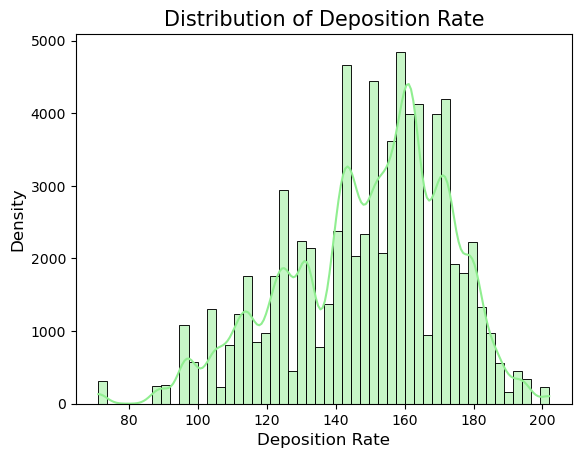

In [8]:
%matplotlib inline
sns.histplot(data['deposition_rate'], kde=True, color='lightgreen', bins=50)
plt.title('Distribution of Deposition Rate', fontsize=15)
plt.xlabel('Deposition Rate', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.show()

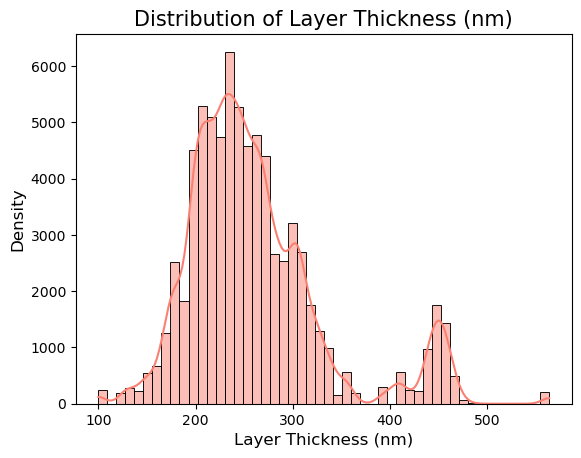

In [9]:
%matplotlib inline
sns.histplot(data['layer_thickness_nm'], kde=True, color='salmon', bins=50)
plt.title('Distribution of Layer Thickness (nm)', fontsize=15)
plt.xlabel('Layer Thickness (nm)', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.show()

In [ ]:
# 2.6 EDA 패키지 활용
# !pip install ydata-profiling

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

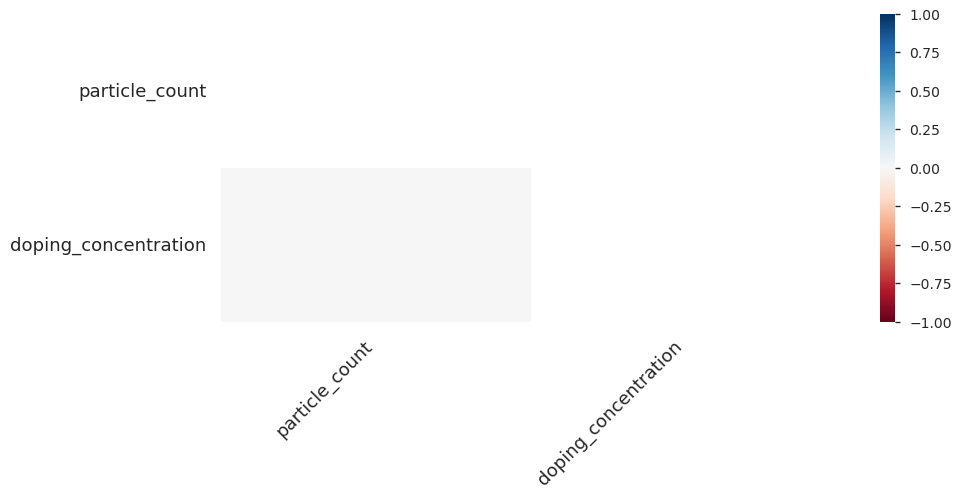

In [10]:
from ydata_profiling import ProfileReport
profile = ProfileReport(data)
profile.to_notebook_iframe()

https://www.nb-data.com/p/python-packages-for-automated-eda

## PCA (Principal Component Analysis)

(출처: [Bryn Mawr College](https://jupyter.brynmawr.edu/services/public/dblank/CS371%20Cognitive%20Science/2016-Fall/PCA.ipynb))

다차원 데이터 세트가 있고 어떤 점이 다른 점에 가장 가까운지 확인하고 싶습니다. PCA는 가장 큰 분산 차원에서 가장 작은 분산 차원까지의 차원을 식별할 수 있게 합니다. PCA1은 가장 큰 분산을 가집니다.

PCA는 다차원의 데이터를 탐색적 분석할 때, 혹은 feature 수를 줄일 때에 종종 사용됩니다.

In [ ]:
from sklearn.datasets import load_breast_cancer
breast = load_breast_cancer()
breast_data = breast.data
print(breast_data.shape)
print(breast.get('feature_names'))

In [ ]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# PCA 수행
pca = PCA()
pca.fit(breast_data)

# 설명된 분산 비율 확인
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

# Scree plot 생성
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_variance_ratio, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Scree Plot')
plt.show()

In [ ]:
# Scree plot에서 꺾이는 (elbow) 지점의 component 개수를 택합니다
n_components = 2
pca = PCA(n_components=n_components)
breast_data_pca = pca.fit_transform(breast_data)

In [ ]:
# 2차원 시각화 (첫 두 개의 주성분 사용)
plt.figure(figsize=(10, 5))
plt.scatter(breast_data_pca[:, 0], breast_data_pca[:, 1], c=breast.target)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Result Visualization')
plt.show()

In [ ]:
# 주성분의 구성 확인
components_df = pd.DataFrame(pca.components_.T, index=breast.get('feature_names'), columns=[f'PC{i+1}' for i in range(n_components)])
components_df = components_df.round(4)
components_df.sort_values('PC1', ascending=False)

다음의 순서로 PCA를 수행합니다.
1. iris 데이터셋을 로드합니다. (`sklearn`의 `load_iris` 함수를 사용)
2. PCA를 수행하고 Scree plot을 생성하여 최적 component 수를 확인합니다.
3. 누적 설명 분산 비율이 95%를 넘는 지점을 최적 component 수로 선택합니다.
4. 선택된 component 수로 PCA를 다시 수행합니다.
5. 첫 두 개의 주성분을 사용하여 2차원 시각화를 합니다.
6. 각 주성분의 구성을 확인합니다.

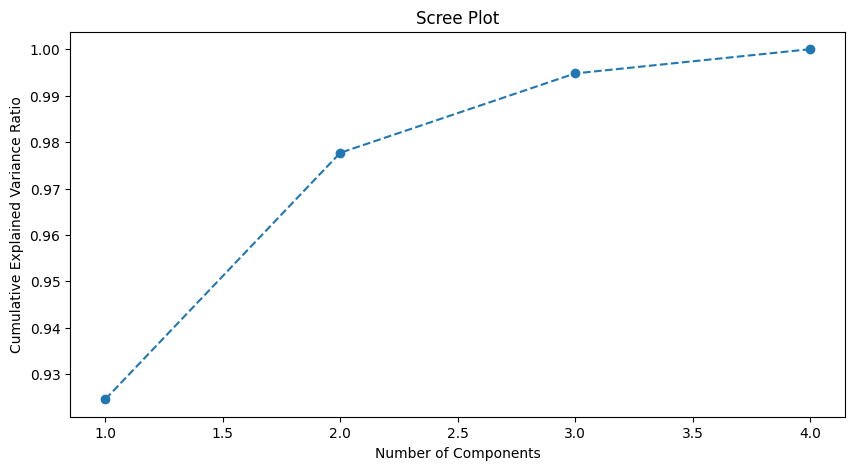

In [3]:
# 여기에 작성해 주세요
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
iris = load_iris()

# PCA 수행
pca = PCA()
pca.fit(iris.data)

# 설명된 분산 비율 확인
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

# Scree plot 생성
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_variance_ratio, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Scree Plot')
plt.show()


In [4]:
# Scree plot에서 꺾이는 (elbow) 지점의 component 개수를 택합니다
n_components = 2
pca = PCA(n_components=n_components)
iris_data_pca = pca.fit_transform(iris.data)

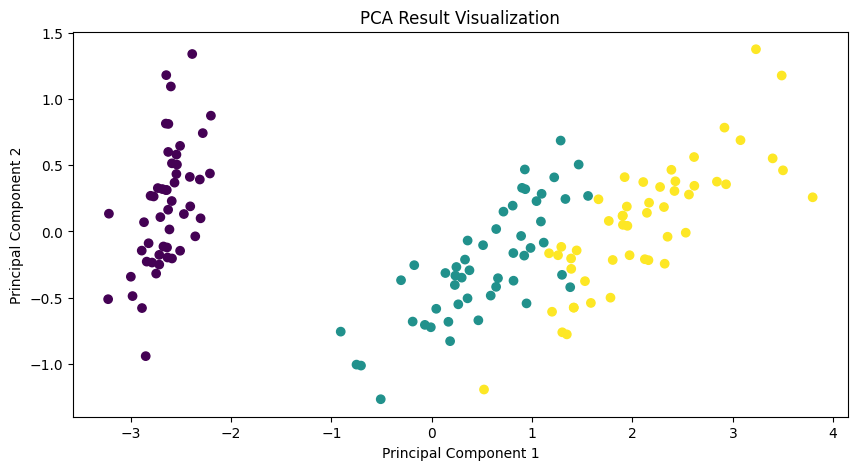

In [5]:
# 2차원 시각화 (첫 두 개의 주성분 사용)
plt.figure(figsize=(10, 5))
plt.scatter(iris_data_pca[:, 0], iris_data_pca[:, 1], c=iris.target)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Result Visualization')
plt.show()